In [1]:
# Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from datetime import datetime

%matplotlib inline
mpl.rcParams['figure.figsize'] = (16,9)

pd.set_option('display.max_rows', 500)

# Collection of Data

In [2]:
#Data Collection from the csv file
data_path="https://covid.ourworldindata.org/data/owid-covid-data.csv"
intial_data = pd.read_csv(data_path)

In [3]:
# Display of raw data
intial_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
# Extraction of desired data
imp_data = intial_data[['date', 'location','total_cases', 'population', 'people_fully_vaccinated']]

In [5]:
# Display of desired data
imp_data.tail()

,date,location,total_cases,population,people_fully_vaccinated
197460,2022-06-24,Zimbabwe,255309.0,15092171.0,4620396.0
197461,2022-06-25,Zimbabwe,255309.0,15092171.0,4622428.0
197462,2022-06-26,Zimbabwe,255355.0,15092171.0,4624556.0
197463,2022-06-27,Zimbabwe,255383.0,15092171.0,NaN
197464,2022-06-28,Zimbabwe,255383.0,15092171.0,NaN


In [6]:
# Renaming the columns 
renamed_imp_data = imp_data.rename(columns={'location':'country', 'total_cases':'absolut_covid_cases','population':'population_size', 'people_fully_vaccinated':'vaccinated'})

In [7]:
#Display of renamed desired data
renamed_imp_data.head()

,date,country,absolut_covid_cases,population_size,vaccinated
0,2020-02-24,Afghanistan,5.0,39835428.0,NaN
1,2020-02-25,Afghanistan,5.0,39835428.0,NaN
2,2020-02-26,Afghanistan,5.0,39835428.0,NaN
3,2020-02-27,Afghanistan,5.0,39835428.0,NaN
4,2020-02-28,Afghanistan,5.0,39835428.0,NaN


In [8]:
renamed_imp_data['Relative_cases'] = renamed_imp_data['absolut_covid_cases']/max(renamed_imp_data['population_size'])
renamed_imp_data['vaccination_rate'] = (renamed_imp_data['vaccinated']/renamed_imp_data['population_size'])*100
#data_trivial['vaccination_rate'] = data_trivial['vaccination_ratio']*100

In [9]:
renamed_imp_data.tail()

,date,country,absolut_covid_cases,population_size,vaccinated,Relative_cases,vaccination_rate
197460,2022-06-24,Zimbabwe,255309.0,15092171.0,4620396.0,0.000032,30.614522
197461,2022-06-25,Zimbabwe,255309.0,15092171.0,4622428.0,0.000032,30.627986
197462,2022-06-26,Zimbabwe,255355.0,15092171.0,4624556.0,0.000032,30.642086
197463,2022-06-27,Zimbabwe,255383.0,15092171.0,NaN,0.000032,NaN
197464,2022-06-28,Zimbabwe,255383.0,15092171.0,NaN,0.000032,NaN


# Correction of data type

In [10]:
#Correction of data type of date 
date = renamed_imp_data['date'][0]


In [11]:
date_idx = [datetime.strptime(each, '%Y-%m-%d') for each in renamed_imp_data.date]

In [12]:
renamed_imp_data['date'] = date_idx

In [13]:
renamed_imp_data.dtypes

date                   datetime64[ns]
country                        object
absolut_covid_cases           float64
population_size               float64
vaccinated                    float64
Relative_cases                float64
vaccination_rate              float64
dtype: object

In [14]:
#Display of all the countries without any repeatation
renamed_imp_data['country'].unique()


array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [15]:
data_Brazil= renamed_imp_data[renamed_imp_data['country'] == 'Brazil']
data_Brazil.tail()

,date,country,absolut_covid_cases,population_size,vaccinated,Relative_cases,vaccination_rate
25488,2022-06-24,Brazil,32023166.0,213993441.0,168569319.0,0.004066,78.773124
25489,2022-06-25,Brazil,32023166.0,213993441.0,168570301.0,0.004066,78.773583
25490,2022-06-26,Brazil,32023166.0,213993441.0,168577895.0,0.004066,78.777132
25491,2022-06-27,Brazil,32130316.0,213993441.0,168604658.0,0.004080,78.789638
25492,2022-06-28,Brazil,32206954.0,213993441.0,200602262.0,0.004090,93.742248


# Desired countries data anlaysis

In [16]:
Desired_Countries = ['United Kingdom', 'Brazil', 'Italy']
data_analysis = data_Brazil                     
                     

In [17]:
data_analysis.head()

,date,country,absolut_covid_cases,population_size,vaccinated,Relative_cases,vaccination_rate
24639,2020-02-26,Brazil,1.0,213993441.0,NaN,1.269847e-10,NaN
24640,2020-02-27,Brazil,1.0,213993441.0,NaN,1.269847e-10,NaN
24641,2020-02-28,Brazil,1.0,213993441.0,NaN,1.269847e-10,NaN
24642,2020-02-29,Brazil,2.0,213993441.0,NaN,2.539694e-10,NaN
24643,2020-03-01,Brazil,2.0,213993441.0,NaN,2.539694e-10,NaN


In [18]:
data_analysis = data_analysis.set_index(['date'])

In [19]:
renamed_imp_data= renamed_imp_data.set_index(['date'])

In [20]:

for each in Desired_Countries:
    data_analysis[each+'_covid_cases'] = pd.DataFrame(renamed_imp_data[renamed_imp_data['country'] == each]['absolut_covid_cases'])
    data_analysis[each+'_Relativecases'] = pd.DataFrame(renamed_imp_data[renamed_imp_data['country'] == each]['Relative_cases'])
    data_analysis[each+'_vaccinationRate'] = pd.DataFrame(renamed_imp_data[renamed_imp_data['country'] == each]['vaccination_rate'])

In [21]:
data_analysis.tail(30)

,country,absolut_covid_cases,population_size,vaccinated,Relative_cases,vaccination_rate,United Kingdom_covid_cases,United Kingdom_Relativecases,United Kingdom_vaccinationRate,Brazil_covid_cases,Brazil_Relativecases,Brazil_vaccinationRate,Italy_covid_cases,Italy_Relativecases,Italy_vaccinationRate
date,,,,,,,,,,,,,,,
2022-05-30,Brazil,30977661.0,213993441.0,166071932.0,0.003934,77.606085,22370976.0,0.002841,73.298636,30977661.0,0.003934,77.606085,17396723.0,0.002209,79.403061
2022-05-31,Brazil,31019038.0,213993441.0,166104268.0,0.003939,77.621196,22376777.0,0.002842,73.311501,31019038.0,0.003939,77.621196,17421410.0,0.002212,79.404393
2022-06-01,Brazil,31060017.0,213993441.0,166164004.0,0.003944,77.649111,22382207.0,0.002842,73.324151,31060017.0,0.003944,77.649111,17440232.0,0.002215,79.405438
2022-06-02,Brazil,31101290.0,213993441.0,NaN,0.003949,NaN,22382336.0,0.002842,73.327655,31101290.0,0.003949,NaN,17457950.0,0.002217,79.405478
2022-06-03,Brazil,31137479.0,213993441.0,166365243.0,0.003954,77.743151,22382336.0,0.002842,73.329380,31137479.0,0.003954,77.743151,17467642.0,0.002218,79.406522
2022-06-04,Brazil,31137479.0,213993441.0,166424506.0,0.003954,77.770844,22382336.0,0.002842,73.338869,31137479.0,0.003954,77.770844,17490451.0,0.002221,79.407516
2022-06-05,Brazil,31137479.0,213993441.0,166459996.0,0.003954,77.787429,22382336.0,0.002842,73.343716,31137479.0,0.003954,77.787429,17505973.0,0.002223,79.407648
2022-06-06,Brazil,31195118.0,213993441.0,166493992.0,0.003961,77.803315,22415389.0,0.002846,73.350818,31195118.0,0.003961,77.803315,17514589.0,0.002224,79.408515
2022-06-07,Brazil,31266163.0,213993441.0,166572602.0,0.003970,77.840050,22425626.0,0.002848,73.357901,31266163.0,0.003970,77.840050,17543136.0,0.002228,79.409686


### Ploting of Covid cases data

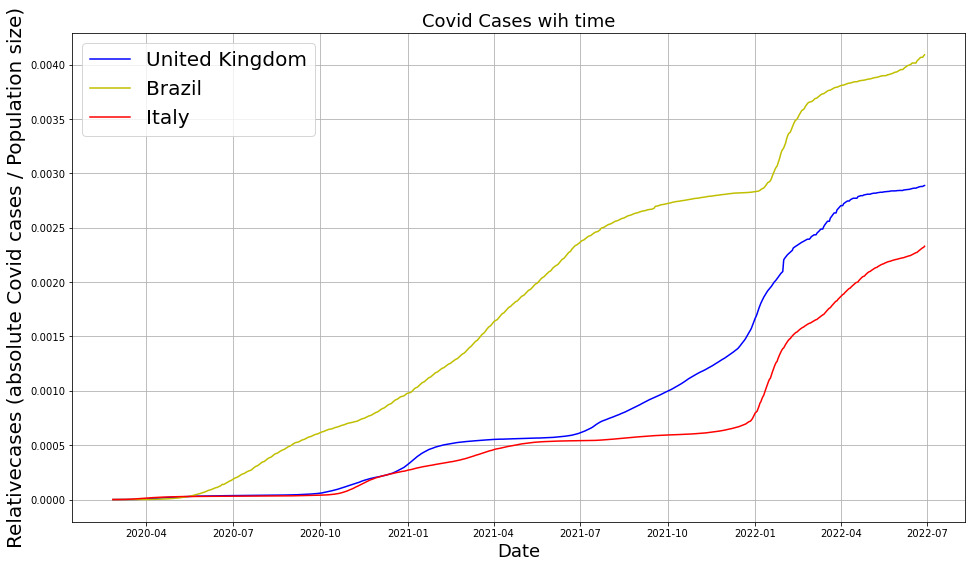

In [22]:
figure, coordinate1 = plt.subplots(1,1)
coordinate1.plot(data_analysis.index, data_analysis['United Kingdom_Relativecases'], label='United Kingdom', color = 'b')
coordinate1.plot(data_analysis.index, data_analysis['Brazil_Relativecases'], label='Brazil', color = 'y')
coordinate1.plot(data_analysis.index, data_analysis['Italy_Relativecases'], label='Italy', color = 'r')

coordinate1.set_yscale('linear')

coordinate1.set_title('Covid Cases wih time', size = 18)
coordinate1.set_xlabel('Date', size = 18)
coordinate1.set_ylabel('Relativecases (absolute Covid cases / Population size)', size = 20)

coordinate1.legend(loc='best', prop={'size':20})
plt.grid()

### Ploting % of vaccinated population overtime

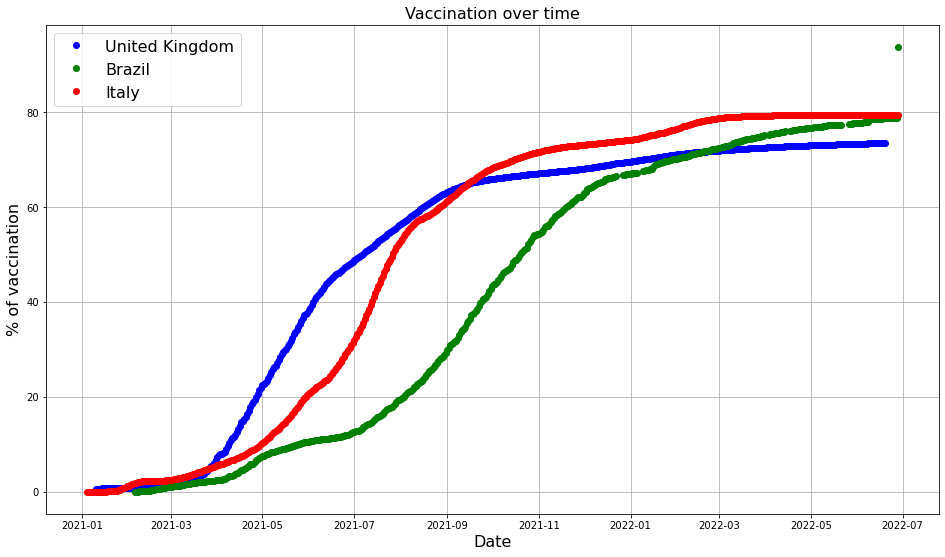

In [23]:
figure, coordinate2 = plt.subplots(1,1)
coordinate2.plot(data_analysis.index, data_analysis['United Kingdom_vaccinationRate'],'o', label='United Kingdom', color = 'b')
coordinate2.plot(data_analysis.index, data_analysis['Brazil_vaccinationRate'],'o', label='Brazil', color = 'g')
coordinate2.plot(data_analysis.index, data_analysis['Italy_vaccinationRate'],'o', label='Italy', color = 'r')

coordinate2.set_yscale('linear')

coordinate2.set_title('Vaccination over time', size = 16)
coordinate2.set_xlabel('Date', size = 16)
coordinate2.set_ylabel('% of vaccination', size = 16)

coordinate2.legend(loc='best', prop={'size':16})
plt.grid()